# Financial Market Volatility Prediction
**Siyuan He, Yi Han, Team A**

------Preview of Financial Data------


,VIX,SP500,IRX
Date,,,
2015-01-02,17.790001,2058.199951,0.015
2015-01-05,19.920000,2020.579956,0.003
2015-01-06,21.120001,2002.609985,0.020
2015-01-07,19.309999,2025.900024,0.020
2015-01-08,17.010000,2062.139893,0.018



------Dataset Information------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2015-01-02 to 2024-12-31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   VIX     2516 non-null   float64
 1   SP500   2516 non-null   float64
 2   IRX     2515 non-null   float64
dtypes: float64(3)
memory usage: 78.6 KB
None

------Data Time Range------
Start Date: 2015-01-02 00:00:00
End Date: 2024-12-31 00:00:00


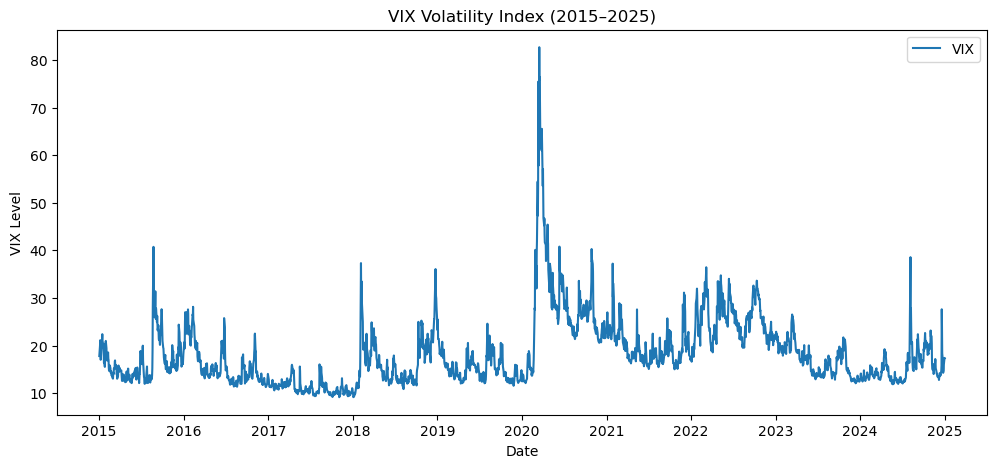

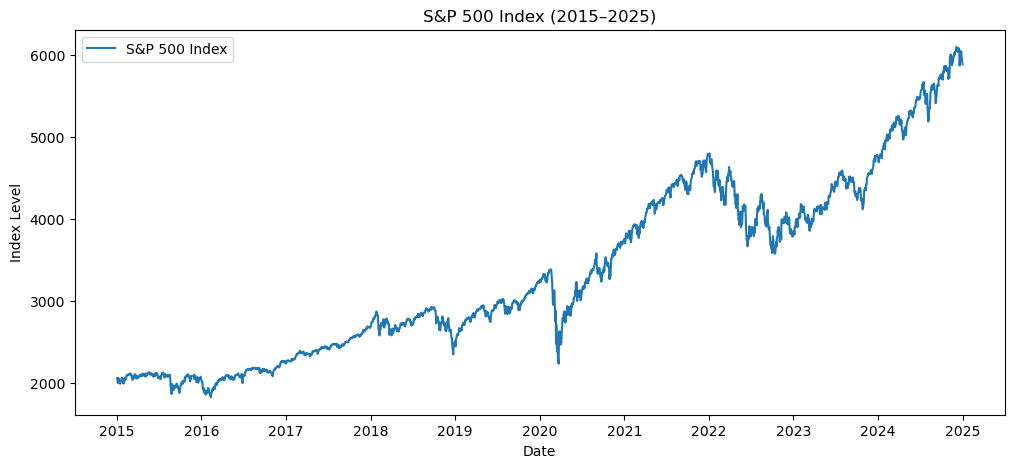

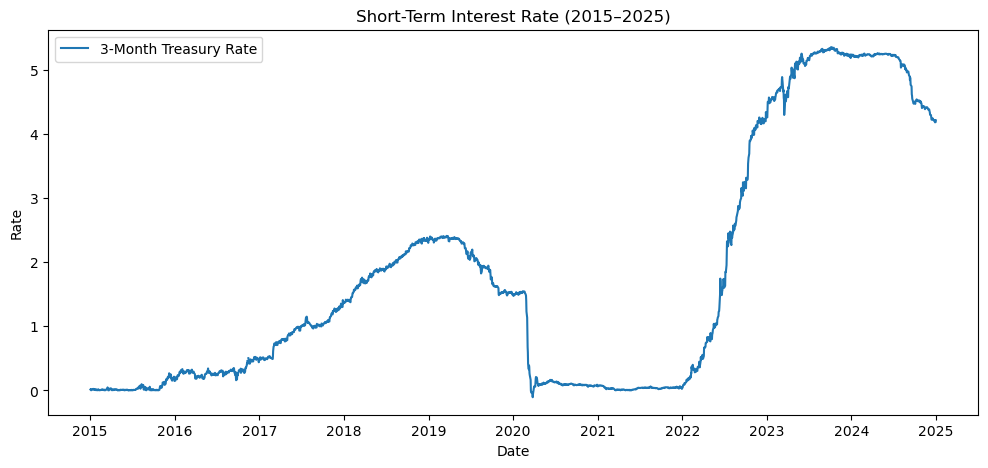

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Import and Preview Data
df = pd.read_csv("financial_data_yahoo.csv", parse_dates=["Date"], index_col="Date")

print("------Preview of Financial Data------")
display(df.head())

print("\n------Dataset Information------")
print(df.info())

print("\n------Data Time Range------")
print("Start Date:", df.index.min())
print("End Date:", df.index.max())

# Plot
plt.figure(figsize=(12,5))
plt.plot(df.index, df["VIX"], label="VIX")
plt.title("VIX Volatility Index (2015–2025)")
plt.xlabel("Date")
plt.ylabel("VIX Level")
plt.legend()
plt.show()

plt.figure(figsize=(12,5))
plt.plot(df.index, df["SP500"], label="S&P 500 Index")
plt.title("S&P 500 Index (2015–2025)")
plt.xlabel("Date")
plt.ylabel("Index Level")
plt.legend()
plt.show()

plt.figure(figsize=(12,5))
plt.plot(df.index, df["IRX"], label="3-Month Treasury Rate")
plt.title("Short-Term Interest Rate (2015–2025)")
plt.xlabel("Date")
plt.ylabel("Rate")
plt.legend()
plt.show()

In [13]:
### Missing Value Handling
# Check missing values
print("------Missing Values Before Cleaning------")
print(df.isna().sum())

------Missing Values Before Cleaning------
VIX      0
SP500    0
IRX      1
dtype: int64


In [14]:
# Handle missing values
df["IRX"] = df["IRX"].ffill()

# Check again after cleaning
print("\n------Missing Values After Cleaning------")
print(df.isna().sum())


------Missing Values After Cleaning------
VIX      0
SP500    0
IRX      0
dtype: int64


In [15]:
### Outlier Detection
from scipy import stats

# Z-score
z_scores = np.abs(stats.zscore(df.dropna()))
outlier_mask = (z_scores > 3)
outlier_counts = np.sum(outlier_mask, axis=0)

print("------Outlier Counts Detected by Z-score------")
for col, count in zip(df.columns, outlier_counts):
    print(f"{col}: {count} outliers")


# IQR Method
iqr_outliers = {}
for col in df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    iqr_outliers[col] = df[(df[col] < lower) | (df[col] > upper)][col]

print("\n------Outlier Counts Detected by IQR------")
for col, outliers in iqr_outliers.items():
    print(f"{col}: {len(outliers)} outliers")

------Outlier Counts Detected by Z-score------
VIX: 34 outliers
SP500: 0 outliers
IRX: 0 outliers

------Outlier Counts Detected by IQR------
VIX: 79 outliers
SP500: 0 outliers
IRX: 0 outliers


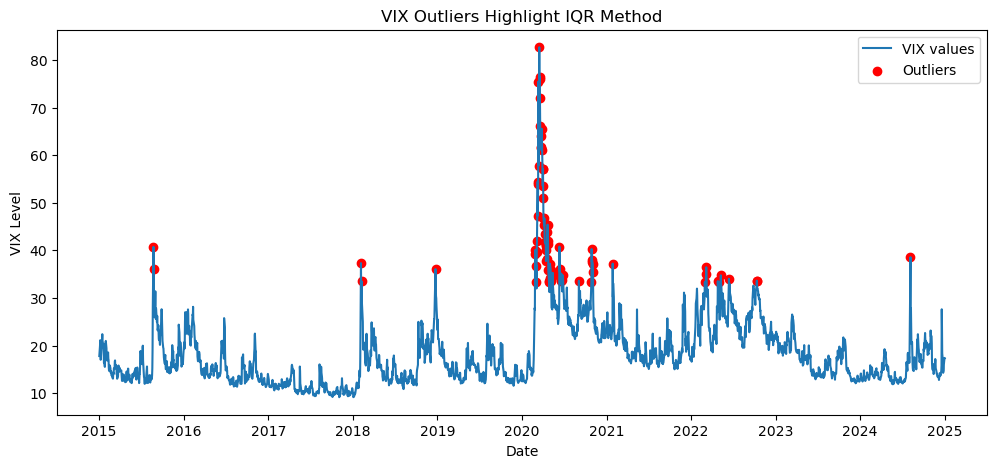

In [16]:
# Visualization
plt.figure(figsize=(12,5))
plt.plot(df.index, df["VIX"], label="VIX values")
plt.scatter(iqr_outliers["VIX"].index, iqr_outliers["VIX"], color="red", label="Outliers")
plt.title("VIX Outliers Highlight IQR Method")
plt.xlabel("Date")
plt.ylabel("VIX Level")
plt.legend()
plt.show()

------Summary Statistics Before Scaling------


,VIX,SP500,IRX
count,2516.000000,2516.000000,2516.000000
mean,18.268736,3356.124980,1.756371
std,7.282610,1083.898653,1.865833
min,9.140000,1829.079956,-0.105000
25%,13.347500,2432.287476,0.110000
50%,16.330000,3004.994995,1.054000
75%,21.322500,4204.595093,2.388500
max,82.690002,6090.270020,5.348000


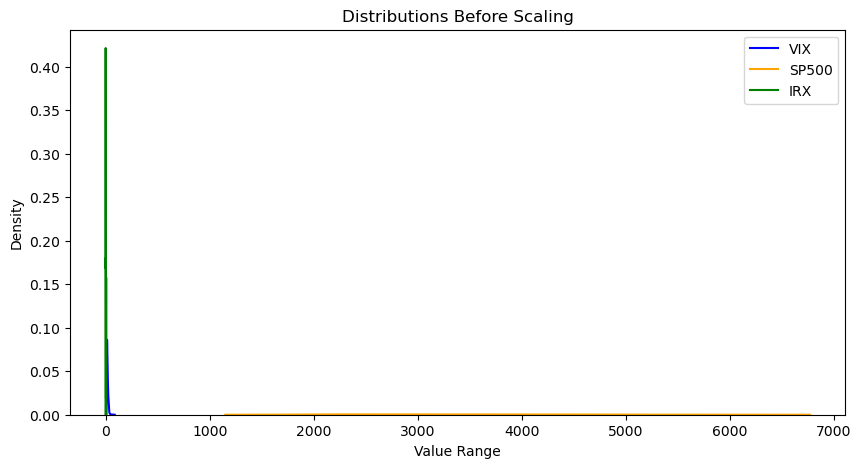


------Summary Statistics After Scaling (Z-score)------


,VIX,SP500,IRX
count,2.516000e+03,2.516000e+03,2.516000e+03
mean,-1.355566e-16,9.037110e-17,-2.259277e-17
std,1.000199e+00,1.000199e+00,1.000199e+00
min,-1.253747e+00,-1.409125e+00,-9.978069e-01
25%,-6.758860e-01,-8.524977e-01,-8.825540e-01
50%,-2.662674e-01,-3.240153e-01,-3.765131e-01
75%,4.194061e-01,7.829503e-01,3.388594e-01
max,8.847662e+00,2.523011e+00,1.925330e+00


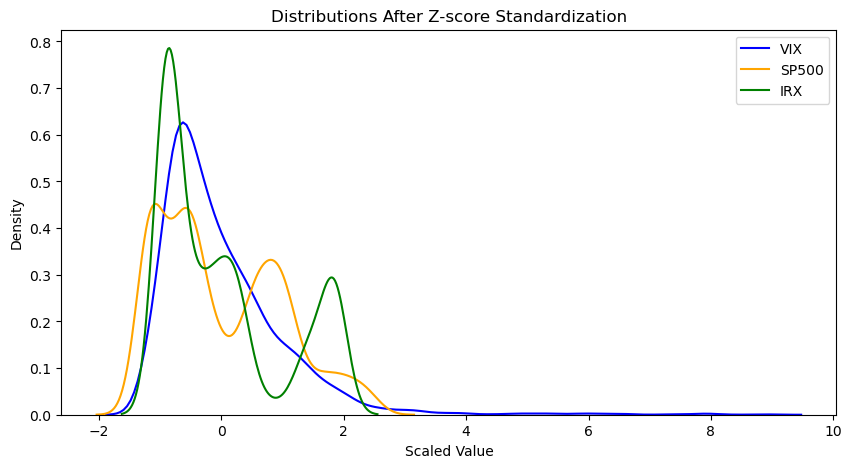

In [17]:
### Standardization
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Preview data before scaling
print("------Summary Statistics Before Scaling------")
display(df.describe())

# Visualize distributions before scaling
plt.figure(figsize=(10, 5))
sns.kdeplot(df["VIX"], label="VIX", color="blue")
sns.kdeplot(df["SP500"], label="SP500", color="orange")
sns.kdeplot(df["IRX"], label="IRX", color="green")
plt.title("Distributions Before Scaling")
plt.xlabel("Value Range")
plt.legend()
plt.show()

# Standardization (Z-score)
scaler = StandardScaler()
df_scaled_z = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)

# Preview data after scaling
print("\n------Summary Statistics After Scaling (Z-score)------")
display(df_scaled_z.describe())

# 4. Visualize scaled distributions
plt.figure(figsize=(10, 5))
sns.kdeplot(df_scaled_z["VIX"], label="VIX", color="blue")
sns.kdeplot(df_scaled_z["SP500"], label="SP500", color="orange")
sns.kdeplot(df_scaled_z["IRX"], label="IRX", color="green")
plt.title("Distributions After Z-score Standardization")
plt.xlabel("Scaled Value")
plt.legend()
plt.show()

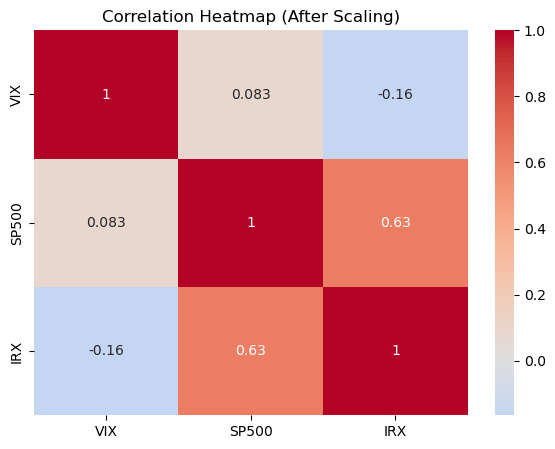

In [18]:
# Heatmap
plt.figure(figsize=(7,5))
sns.heatmap(df_scaled_z.corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (After Scaling)")
plt.show()

In [19]:
### Save the Cleaned and Scaled Data

df_scaled_z_reset = df_scaled_z.reset_index()
output_path = "cleaned_financial_data.csv"
df_scaled_z_reset.to_csv(output_path, index=False)

# Reload
df_check = pd.read_csv(output_path, parse_dates=["Date"])
print("\n------Reloaded Data Preview------")
display(df_check.head())


------Reloaded Data Preview------


,Date,VIX,SP500,IRX
0,2015-01-02,-0.065750,-1.197698,-0.933480
1,2015-01-05,0.226786,-1.232413,-0.939912
2,2015-01-06,0.391595,-1.248995,-0.930799
3,2015-01-07,0.143008,-1.227503,-0.930799
4,2015-01-08,-0.172876,-1.194062,-0.931872


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

# Read cleaned data
df = pd.read_csv("cleaned_financial_data.csv")
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values("Date").reset_index(drop=True)

# Predict the current VIX with three scales
# Explain today's VIX
df["VIX_lag1"]        = df["VIX"].shift(1)
# The rolling mean of VIX over the past 5 days
df["VIX_roll_mean_5"] = df["VIX"].rolling(window=5).mean().shift(1)
# The rolling mean of VIX over the past 22 days
df["VIX_roll_mean_22"]= df["VIX"].rolling(window=22).mean().shift(1)
# The previous day values of SP500 and IRX(exogenous)
df["SP500_lag1"] = df["SP500"].shift(1)
df["IRX_lag1"]   = df["IRX"].shift(1)

df_model = df.dropna().reset_index(drop=True)

FEATURES = ["VIX_lag1","VIX_roll_mean_5","VIX_roll_mean_22","SP500_lag1","IRX_lag1"]
TARGET   = "VIX"

X = df_model[FEATURES].values
y = df_model[TARGET].values
dates = df_model["Date"]

In [21]:
USE_NAIVE_BASELINE = True

def direction_accuracy(y_true, y_pred, y_ref):
    """The accuracy rate of the rise and fall direction based on 'relative to the previous period'"""
    true_direction = np.sign(y_true - y_ref)
    pred_direction = np.sign(y_pred - y_ref)
    return (true_direction == pred_direction).mean()

time_splitter = TimeSeriesSplit(n_splits=5)
oof_predictions = np.zeros_like(y, dtype=float)
results_list = []

for fold, (train_index, val_index) in enumerate(time_splitter.split(X), 1):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    predictions = lr_model.predict(X_val)
    oof_predictions[val_index] = predictions

# Indicator (Linear regression)
    mae  = mean_absolute_error(y_val, predictions)
    rmse = sqrt(mean_squared_error(y_val, predictions))
    da   = direction_accuracy(y_val, predictions, df_model["VIX_lag1"].values[val_index])

    fold_record = {"fold": fold, "n_train": len(train_index), "n_val": len(val_index),
                   "MAE": mae, "RMSE": rmse, "DirAcc": da}

# Calculate the indicators of the Naive baseline for comparison
    if USE_NAIVE_BASELINE:
        naive_predictions = df_model["VIX_lag1"].values[val_index]
        fold_record.update({
            "MAE_Naive":  mean_absolute_error(y_val, naive_predictions),
            "RMSE_Naive": sqrt(mean_squared_error(y_val, naive_predictions)),
            "DirAcc_Naive": direction_accuracy(y_val, naive_predictions, df_model["VIX_lag1"].values[val_index]),
        })
    results_list.append(fold_record)

cv_df = pd.DataFrame(results_list)
print("\n------Time series indicator (HAR-style linear regression vs Naive)------")
display(cv_df.round(4))

print("\n------Average index of time series (Linear regression vs Naive)------")
display(cv_df.drop(columns=["fold","n_train","n_val"]).mean().to_frame("mean").T.round(4))


------Time series indicator (HAR-style linear regression vs Naive)------


,fold,n_train,n_val,MAE,RMSE,DirAcc,MAE_Naive,RMSE_Naive,DirAcc_Naive
0,1,419,415,0.1045,0.2150,0.5229,0.1052,0.2132,0.0048
1,2,834,415,0.1410,0.2031,0.5639,0.1319,0.1942,0.0024
2,3,1249,415,0.2288,0.4311,0.5687,0.2398,0.4243,0.0072
3,4,1664,415,0.1715,0.2371,0.5663,0.1748,0.2407,0.0024
4,5,2079,415,0.1274,0.2114,0.4651,0.1123,0.2098,0.0072



------Average index of time series (Linear regression vs Naive)------


,MAE,RMSE,DirAcc,MAE_Naive,RMSE_Naive,DirAcc_Naive
mean,0.1546,0.2595,0.5373,0.1528,0.2564,0.0048



------HAR linear regression coefficient------


,coef
VIX_lag1,0.8633
VIX_roll_mean_5,0.1102
SP500_lag1,0.0192
IRX_lag1,-0.0174
VIX_roll_mean_22,-0.0081


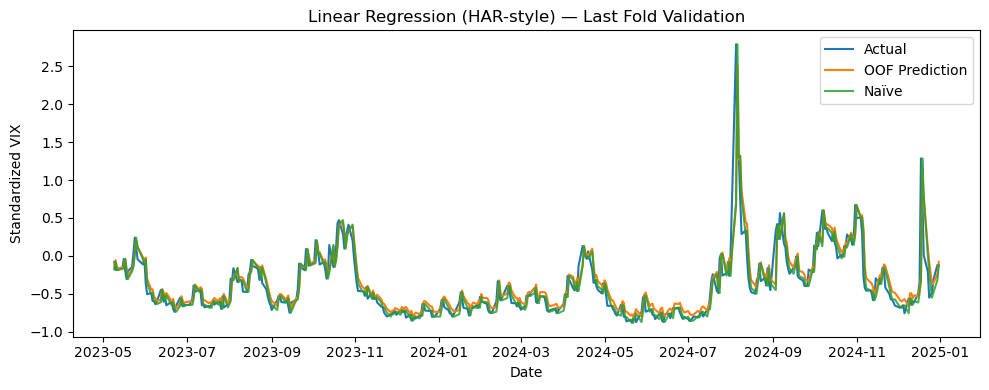

In [ ]:
# Fit on all & Coefficients
final_model = LinearRegression().fit(X, y)
coefficients = pd.Series(final_model.coef_, index=FEATURES).sort_values(key=abs, ascending=False)
print("\n------HAR linear regression coefficient------")
display(coefficients.to_frame("coef").round(4))

# Plot on last fold
last_train_idx, last_val_idx = list(time_splitter.split(X))[-1]
plt.figure(figsize=(10,4))
plt.plot(dates.iloc[last_val_idx], y[last_val_idx], label="Actual")
plt.plot(dates.iloc[last_val_idx], oof_predictions[last_val_idx], label="OOF Prediction")

naive_last_fold = df_model["VIX_lag1"].values[last_val_idx] 
plt.plot(dates.iloc[last_val_idx], naive_last_fold, label="Naïve", alpha=0.85)

plt.title("Linear Regression (HAR-style) — Last Fold Validation")
plt.xlabel("Date"); plt.ylabel("Standardized VIX"); plt.legend(); plt.tight_layout()
plt.show()